In [205]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
data2 = ('/Users/Beba/Documents/JupyterNotebooks/HR_comma_sep.csv')
hr_df = pd.read_csv(data2)

hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [207]:
hr_df.isnull().sum() # love simulated datasets!

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

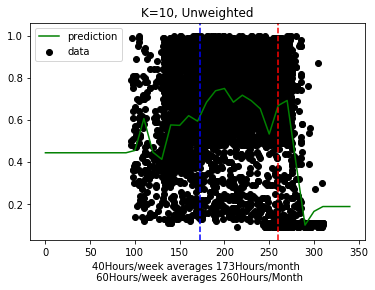

In [230]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(hr_df.average_montly_hours)
Y = hr_df.satisfaction_level
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)
knn_w.fit(X_train, Y_train)

T = np.arange(0, 350, 10)[:, np.newaxis]
Y_ = knn_w.predict(T)

plt.scatter(X_test, Y_test, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.axvline(x=173, color='blue', linestyle='--')
plt.axvline(x=260, color='red', linestyle='--')
plt.xlabel('40Hours/week averages 173Hours/month \n 60Hours/week averages 260Hours/Month')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

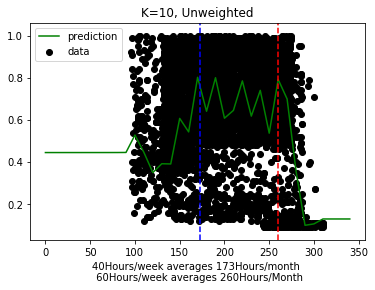

In [229]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(hr_df.average_montly_hours)
Y = hr_df.satisfaction_level
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)
knn_w.fit(X_train, Y_train)

T = np.arange(0, 350, 10)[:, np.newaxis]
Y_ = knn_w.predict(T)

plt.scatter(X_test, Y_test, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.axvline(x=173, color='blue', linestyle='--')
plt.axvline(x=260, color='red', linestyle='--')
plt.xlabel('40Hours/week averages 173Hours/month \n 60Hours/week averages 260Hours/Month')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [211]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.05 (+/- 0.31)
Weighted Accuracy: -0.05 (+/- 0.31)


In [231]:
score = cross_val_score(knn, X_test, Y_test, cv=5)
print("Unweighted Accuracy(test variable): %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_test, Y_test, cv=5)
print("Weighted Accuracy(test variable): %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy(test variable): 0.09 (+/- 0.05)
Weighted Accuracy(test variable): 0.09 (+/- 0.05)


In [226]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(hr_df[['average_montly_hours',
                        'last_evaluation',
                        'number_project',
                        'time_spend_company']])
Y = hr_df.satisfaction_level
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)
knn.fit(X_train, Y_train)

Y_ = knn.predict(X_test)

score = cross_val_score(knn, X_test, Y_, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Unweighted Accuracy: 0.86 (+/- 0.03)


In [227]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(hr_df[['average_montly_hours',
                        'last_evaluation',
                        'number_project',
                        'time_spend_company']])
Y = hr_df.satisfaction_level
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)
knn_w.fit(X_train, Y_train)

Y_ = knn.predict(X_test)

score = cross_val_score(knn_w, X_test, Y_, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Weighted Accuracy: 0.93 (+/- 0.01)


In [234]:
regr = linear_model.LinearRegression()
Y = hr_df['satisfaction_level'].values.reshape(-1, 1)
X = pd.DataFrame(hr_df[['average_montly_hours',
                        'last_evaluation',
                        'number_project',
                        'time_spend_company']])
scaler = preprocessing.StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)

X_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.fit_transform(X_test)
regr.fit(X_scaled, Y_train)


print('Coefficients: \n', regr.coef_)
print('\nIntercept: ', regr.intercept_)
print('\nR-squared: ')
print(regr.score(Xtest_scaled, Y_test))
print(regr.score(X, Y))
print(regr.score(X_scaled, Y_train))

score = cross_val_score(regr, X_test, Y_test, cv=5)
print("Cross Validation Score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Coefficients: 
 [[ 0.00382061  0.04297309 -0.04682688 -0.0236875 ]]

Intercept:  [ 0.61306083]

R-squared: 
0.0577423591682
-5.12535056884
0.053748763914
Cross Validation Score: 0.05 (+/- 0.02)


# Model Comparison

The KNN model performed much better than the OLS regression. Using cross_val_score from the sklearns model_selection module returned scores of .86 and .93 for the KNN regressions with 4 variables. The OLS model received a score of .05 with the same variables. 

Both models were equally easy to work with but the KNN model clearly is a better fit for the data and provides us with a more valuable model. 

I do not know if there could be a reason to use the OLS model instead of the KNN, seeing how poorly the OLS performed with this dataset. The KNN is unambiguously better in this situation.  